<a href="https://colab.research.google.com/github/KaikyDegasperi/LSTMtreino/blob/main/LSTMSemOverfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados de treino:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dados de teste:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       1

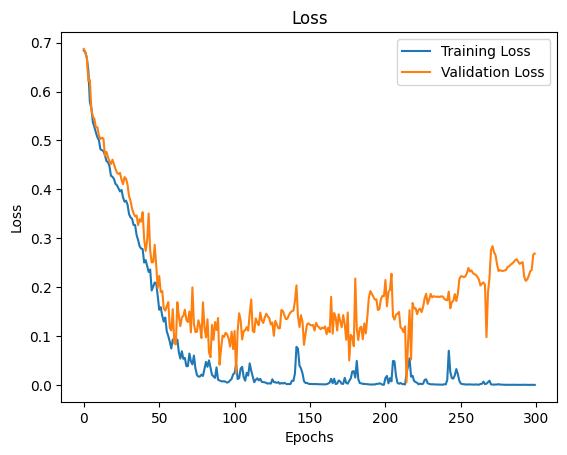

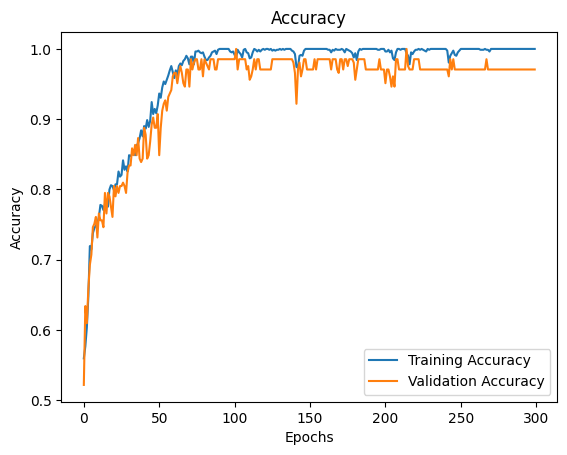

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Carregar os dados de treino
train_data = pd.read_csv('train_heart.csv')

# Carregar os dados de teste
test_data = pd.read_csv('test_heart.csv')

# Visualizando as primeiras linhas dos dados de treino
print("Dados de treino:")
print(train_data.head())

# Visualizando as primeiras linhas dos dados de teste
print("\nDados de teste:")
print(test_data.head())

# Separando as features e o target dos dados de treino
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Separando as features e o target dos dados de teste
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Redimensionando os dados para o formato esperado pela LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Definindo o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Acurácia do modelo:", accuracy)

# Plotando a curva de perda
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotando a curva de acurácia
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


10/10 [==============================] - 1s 8ms/step


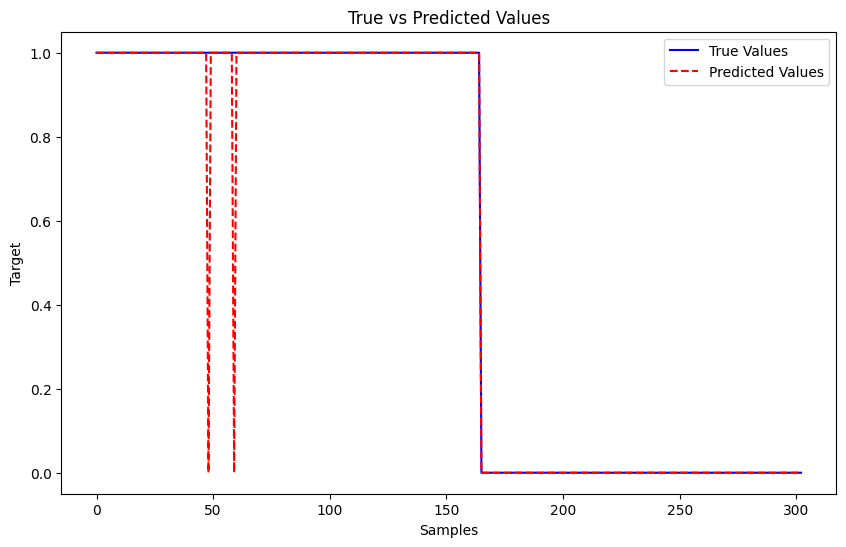

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convertendo as probabilidades em valores binários

# Plotando as previsões em comparação com os valores verdadeiros
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Target')
plt.legend()
plt.show()


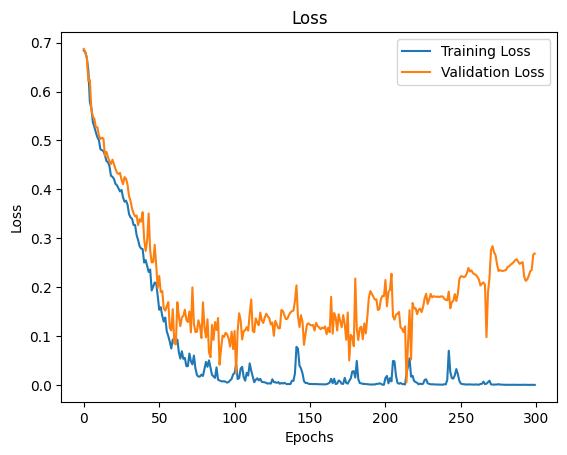

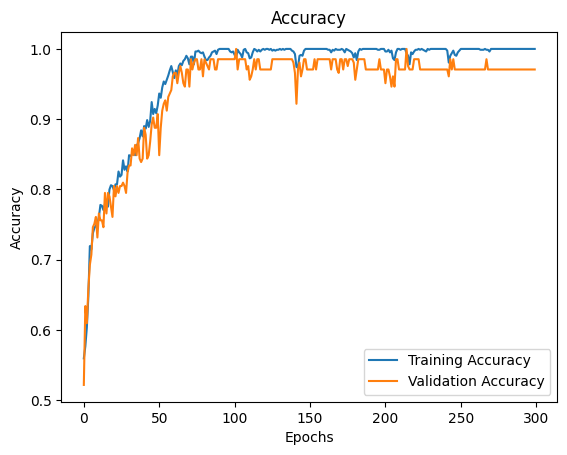

In [ ]:
import matplotlib.pyplot as plt

# Plotar a curva de perda
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar a curva de acurácia
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
